# Analysis Heart Attack Dataset

## About Dataset

age - Age of the patient

sex - Sex of the patient (1 = male; 0 = female)

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - 0= less chance of heart attack 1= more chance of heart attack

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Data Preprocessing

In [5]:
df.loc[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

## Descriptive Statistic Numerical Data

In [9]:
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[numerical_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


## Exploratory Data Analysis

### Univariate Analysis

#### Categorical Data

sex, cp, fbs, restecg, exng, slp, caa, thall, output

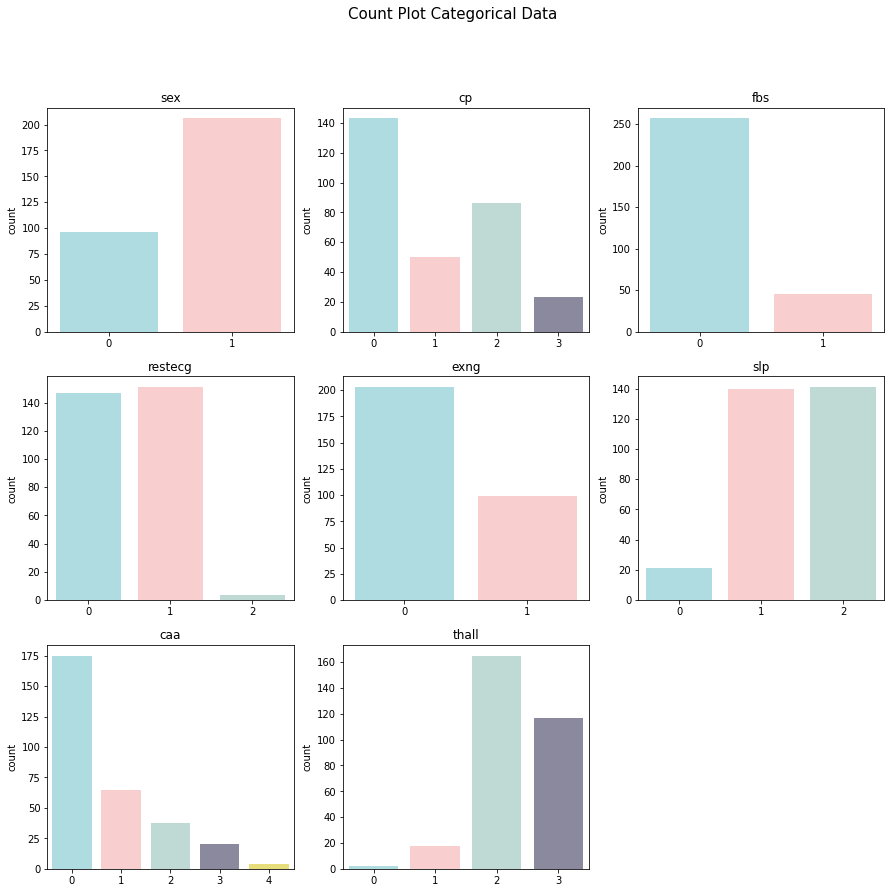

In [20]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

fig, axes = plt.subplots(3, 3, figsize=(15, 14))

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

i = 0
for row in range(0, 3):
    if row == 2:
        for col in range(0, 2):
            plot = sns.countplot(
                x = categorical_cols[i],
                data = df,
                palette = ['#a6e3e9', '#ffc7c7', '#bbded6', '#8785a2', '#f9ed69'],
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(categorical_cols[i])
            i += 1
    else:
        for col in range(0, 3):
            sns.countplot(
                x = categorical_cols[i],
                data = df,
                palette = ['#a6e3e9', '#ffc7c7', '#bbded6', '#8785a2', '#f9ed69'],
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(categorical_cols[i])
            i += 1


fig.suptitle('Count Plot Categorical Data', size=15)
axes[2, 2].remove()
plt.show()

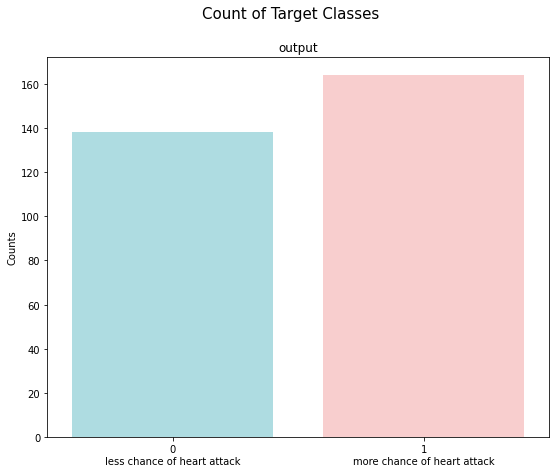

In [11]:
fig, axes = plt.subplots(figsize=(9, 7))

sns.countplot(
    x = 'output',
    data = df,
    palette = ['#a6e3e9', '#ffc7c7'],
    ax = axes
)
fig.suptitle('Count of Target Classes', size=15)
axes.set_xlabel('')
axes.set_ylabel('Counts')
axes.set_title('output')
axes.set_xticklabels(['0\nless chance of heart attack', '1\nmore chance of heart attack'])
plt.show()

#### Numerical Data

age, trtbps, chol, thalachh, oldpeak

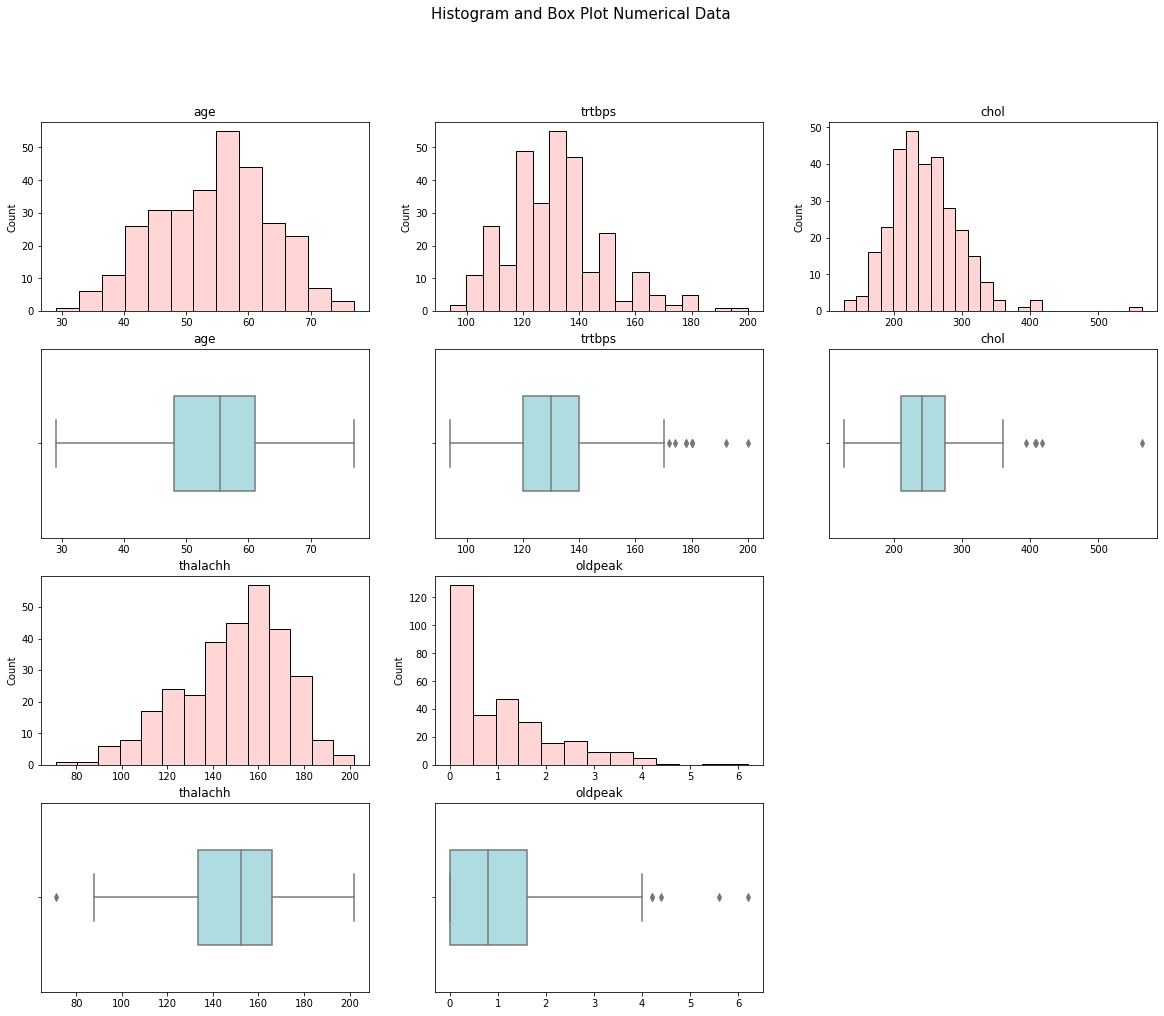

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))

i = 0
for row in range(0, 3, 2):
    if row == 2:
        for col in range(0, 2):
            sns.histplot(
                x = np.array(df[numerical_cols[i]]),
                color = '#ffc7c7',
                ax = axes[row, col]
            )
            axes[row, col].set_title(numerical_cols[i])
            i += 1
    else:
        for col in range(0, 3):
            sns.histplot(
                x = np.array(df[numerical_cols[i]]),
                color = '#ffc7c7',
                ax = axes[row, col]
            )
            axes[row, col].set_title(numerical_cols[i])
            i += 1

i = 0
for row in range(1, 4, 2):
    if row == 3:
        for col in range(0, 2):
            sns.boxplot(
                x = np.array(df[numerical_cols[i]]),
                palette = ['#a6e3e9'],
                width = 0.5,
                ax = axes[row, col]
            )
            axes[row, col].set_title(numerical_cols[i])
            i += 1
            
    else:
        for col in range(0, 3):
            sns.boxplot(
                x = np.array(df[numerical_cols[i]]),
                palette = ['#a6e3e9'],
                width = 0.5,
                ax = axes[row, col]
            )
            axes[row, col].set_title(numerical_cols[i])
            i += 1

fig.suptitle('Histogram and Box Plot Numerical Data', size=15)
axes[2, 2].remove()
axes[3, 2].remove()
plt.show()

### Bivariate Analysis

#### Categorical Data According Target Classes

sex, cp, fbs, restecg, exng, slp, caa, thall, output

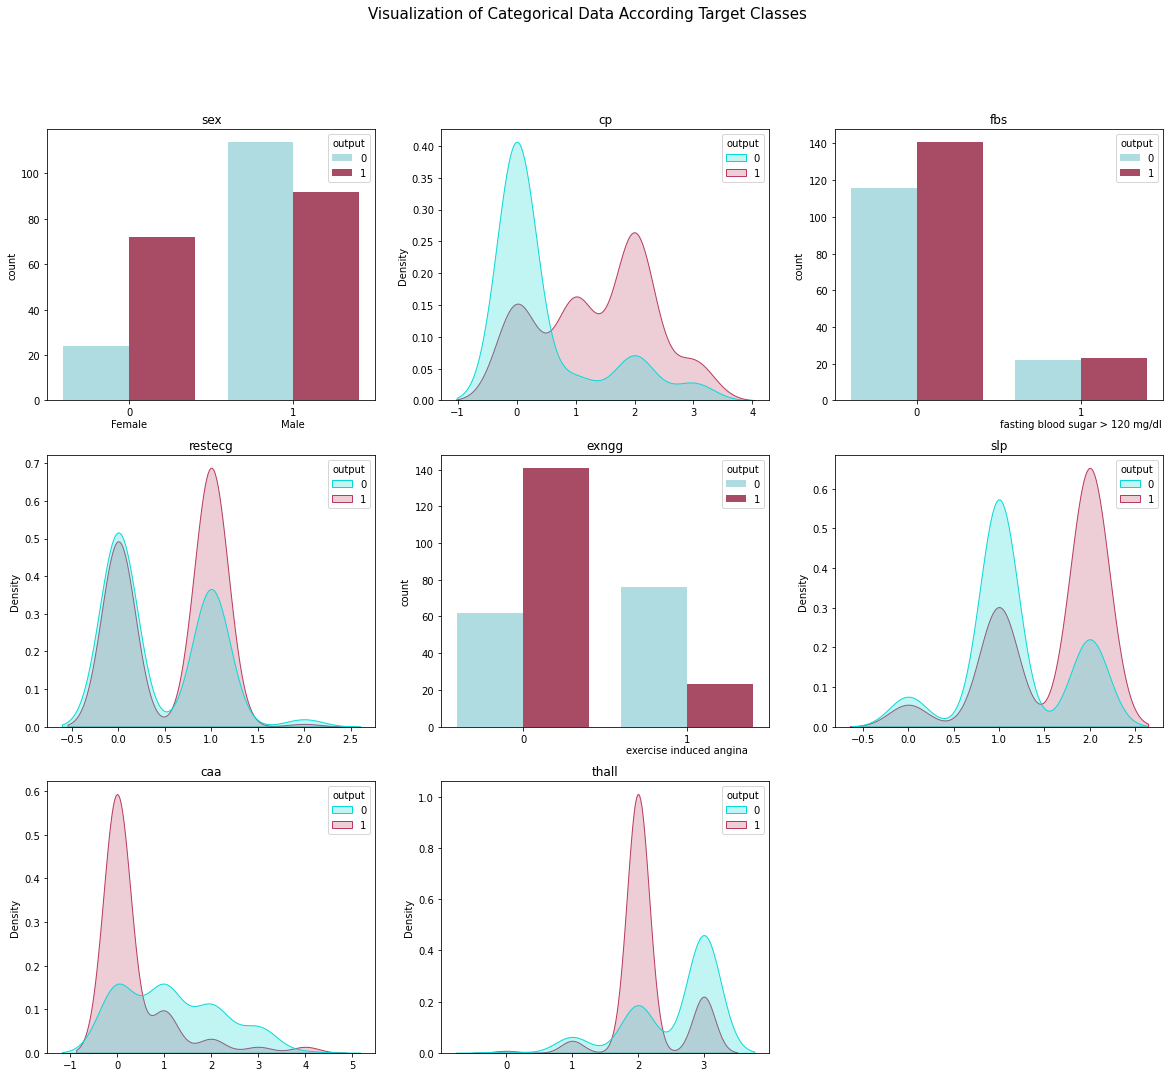

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17))

# sex
sns.countplot(
    x = 'sex',
    hue = 'output',
    data = df,
    palette = ['#a6e3e9', '#b83b5e'],
    ax = axes[0, 0]
)
axes[0, 0].set_xlabel('')
axes[0, 0].set_title('sex')
axes[0, 0].set_xticklabels(['0\nFemale', '1\nMale'])

# cp
sns.kdeplot(
    x = 'cp',
    hue = 'output',
    data = df,
    palette = ['#08d9d6', '#b83b5e'],
    fill = True,
    ax = axes[0, 1]
)
axes[0, 1].set_xlabel('')
axes[0, 1].set_title('cp')

# fbs
sns.countplot(
    x = 'fbs',
    hue = 'output',
    data = df,
    palette = ['#a6e3e9', '#b83b5e'],
    ax = axes[0, 2]
)
axes[0, 2].set_xlabel('')
axes[0, 2].set_title('fbs')
axes[0, 2].set_xticklabels(['0', '1\nfasting blood sugar > 120 mg/dl'])

# restecg
sns.kdeplot(
    x = 'restecg',
    hue = 'output',
    data = df,
    palette = ['#08d9d6', '#b83b5e'],
    fill = True,
    ax = axes[1, 0]
)
axes[1, 0].set_xlabel('')
axes[1, 0].set_title('restecg')
# axes[1, 0].set_xticklabels(['', '', '0', '', '1', '', '2', ''])

# exng
sns.countplot(
    x = 'exng',
    hue = 'output',
    data = df,
    palette = ['#a6e3e9', '#b83b5e'],
    ax = axes[1, 1]
)
axes[1, 1].set_xlabel('')
axes[1, 1].set_title('exngg')
axes[1, 1].set_xticklabels(['0', '1\nexercise induced angina'])

# slp
sns.kdeplot(
    x = 'slp',
    hue = 'output',
    data = df,
    palette = ['#08d9d6', '#b83b5e'],
    fill = True,
    ax = axes[1, 2]
)
axes[1, 2].set_xlabel('')
axes[1, 2].set_title('slp')

# caa
sns.kdeplot(
    x = 'caa',
    hue = 'output',
    data = df,
    palette = ['#08d9d6', '#b83b5e'],
    fill = True,
    ax = axes[2, 0]
)
axes[2, 0].set_xlabel('')
axes[2, 0].set_title('caa')

# thall
sns.kdeplot(
    x = 'thall',
    hue = 'output',
    data = df,
    palette = ['#08d9d6', '#b83b5e'],
    fill = True,
    ax = axes[2, 1]
)
axes[2, 1].set_xlabel('')
axes[2, 1].set_title('thall')

fig.suptitle('Visualization of Categorical Data According Target Classes', size=15)
axes[2, 2].remove()
plt.show()

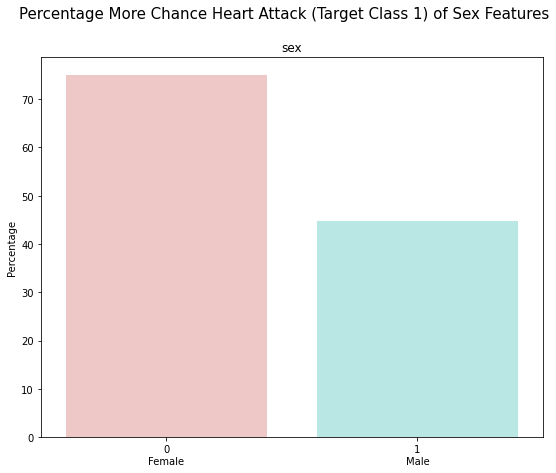

In [14]:
percentage = []
percentage.append(df.loc[(df['sex'] == 1) & (df['output'] == 1)].count()[0]*100/df.loc[df['sex'] == 1].count()[0])
percentage.append(df.loc[(df['sex'] == 0) & (df['output'] == 1)].count()[0]*100/df.loc[df['sex'] == 0].count()[0])

fig, axes = plt.subplots(figsize=(9, 7))

sns.barplot(
    x = df['sex'].unique(),
    y = percentage,
    palette = ['#f5c0c0', '#b0efeb'],
    ax = axes
)

fig.suptitle('Percentage More Chance Heart Attack (Target Class 1) of Sex Features', size=15)
axes.set_title('sex')
axes.set_ylabel('Percentage')
axes.set_xticklabels(['0\nFemale', '1\nMale'])
plt.show()

#### Numerical Data According Target Classes

age, trtbps, chol, thalachh, oldpeak

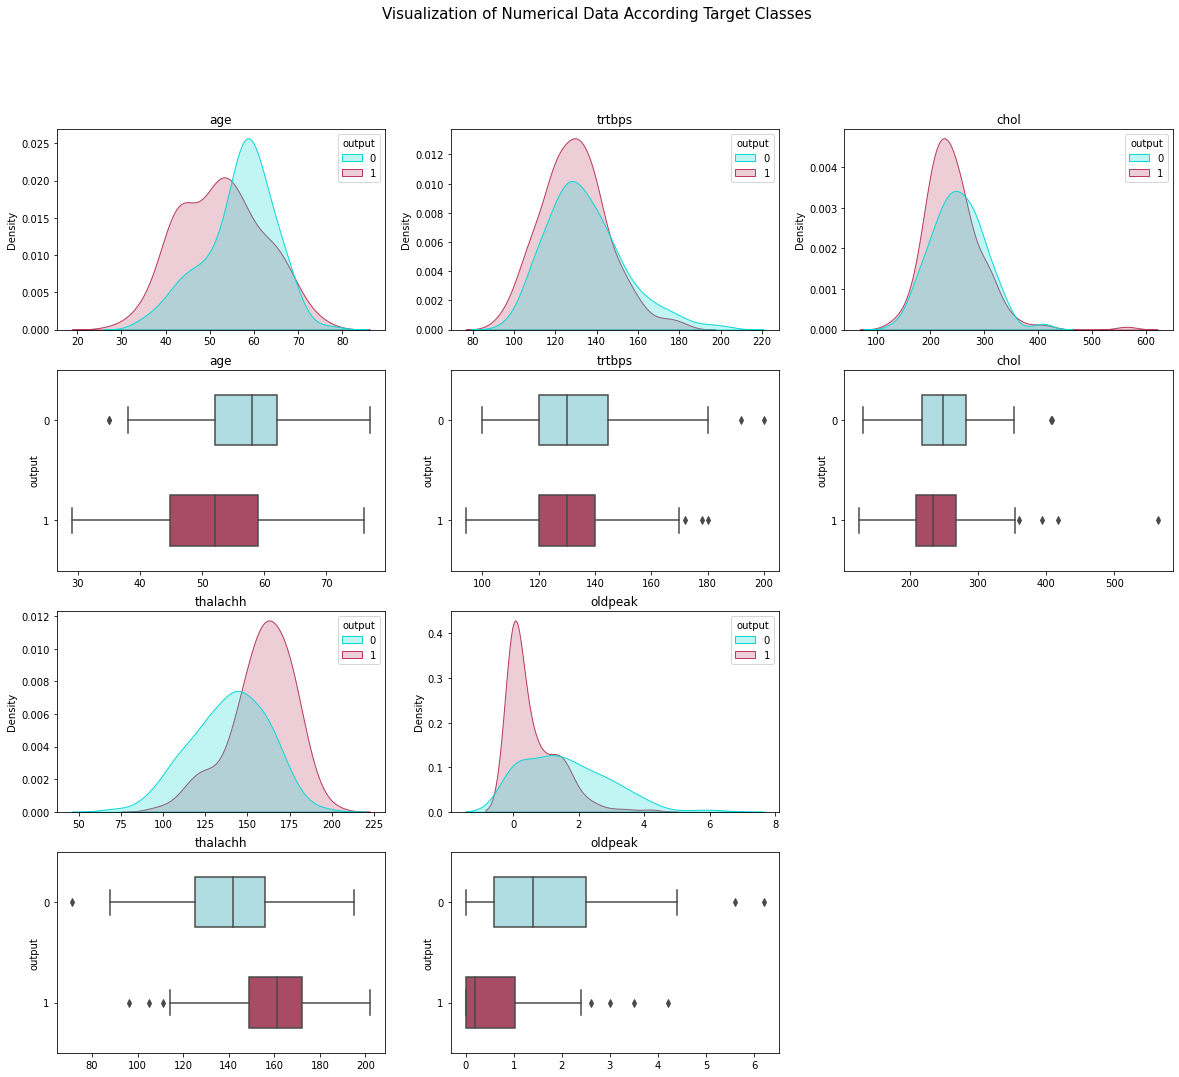

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20, 17))

i = 0
for row in range(0, 3, 2):
    if row == 2:
        for col in range(0, 2):
            sns.kdeplot(
                x = numerical_cols[i],
                hue = 'output',
                data = df,
                palette = ['#08d9d6', '#b83b5e'],
                fill = True,
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(numerical_cols[i])
            i += 1
    else:
        for col in range(0, 3):
            sns.kdeplot(
                x = numerical_cols[i],
                hue = 'output',
                data = df,
                palette = ['#08d9d6', '#b83b5e'],
                fill = True,
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(numerical_cols[i])
            i += 1

i = 0
for row in range(1, 4, 2):
    if row == 3:
        for col in range(0, 2):
            sns.boxplot(
                x = numerical_cols[i],
                y = 'output',
                data = df,
                orient = 'h',
                palette = ['#a6e3e9', '#b83b5e'],
                width = 0.5,
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(numerical_cols[i])
            i += 1
    else:
        for col in range(0, 3):
            sns.boxplot(
                x = numerical_cols[i],
                y = 'output',
                data = df,
                orient = 'h',
                palette = ['#a6e3e9', '#b83b5e'],
                width = 0.5,
                ax = axes[row, col]
            )
            axes[row, col].set_xlabel('')
            axes[row, col].set_title(numerical_cols[i])
            i += 1

fig.suptitle('Visualization of Numerical Data According Target Classes', size=15)
axes[2, 2].remove()
axes[3, 2].remove()
plt.show()

### Multivariate Analysis

#### Correlation

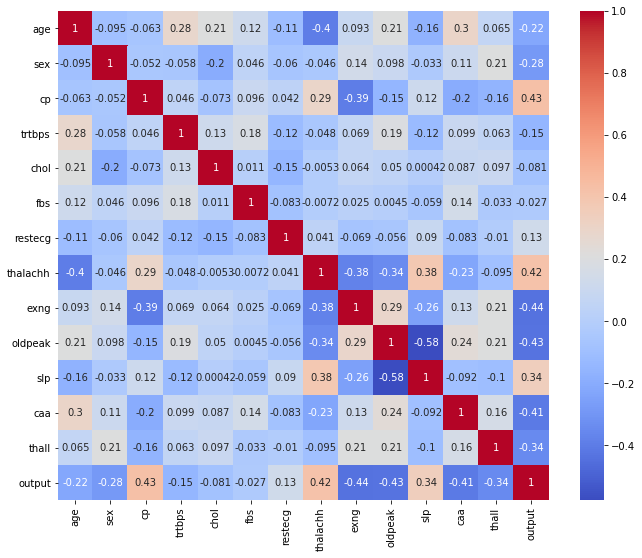

In [16]:
fig, axes = plt.subplots(figsize=(11, 9))

sns.heatmap(
    data = df.corr(),
    cmap = 'coolwarm',
    annot = True,
    ax = axes
)

plt.show()

### Conclusion

1. Univariate Analysis
    - The sex feature has more male (1) observation data than female (0) observation data
    - Target classes doesn't occur imbalanced data
    - Every numerical data has outliers except age feature
    - The distribution of the age feature almost has a normal distribution
2. Bivariate Analysis
    - sex - Female has greater percentage of more chance heart attack than male
    - cp - Chest pain type 2 (non-anginal pain) has greatest percentage of more chance heart attack
    - restecg - Resting electrocardiographic results 1 (ST-T wave normality) has greatest percentage of more chance heart attack
    - exngg - Exercise induced angina 0 (no) has greater percentage of more chance heart attach than 1 (yes)
    - slp - Slope 2 has greatest percentage of more chance heart attack
    - caa - Number of major vessels 0 has greatest percentage of more chance heart attack
    - thall - Thalium Stress Test result 2 has greatest percentage of more chance heart attack
    - age - Age around 50 have a greater chance of having heart attack
    - thalachh - Maximum heart rate achieved
        - greater maximum heart rate achieved, greater chance to heart attack
    - oldpeak - Previous peak
        - lowest previous peak achieved, greater chance to heart attack
3. Multivariate Analysis
    - according to the heatmap, there are few features that have a fairly large positive correlation with output, such as cp, thalachh, and slp.
    - according to the heatmap, there are few features that have a fairly large negative correlation with output, such as exng, oldpeak, and caa.